### Исследование точности выдаваемых рекомендаций для различных параметров эмбеддинга и числа выборки чанков в обработке
- chunk_size = [512, 1024, 2048]
- chunk_overlap = [0, 100, 200]
- k = [3, 5, 10, 25]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./experiment_results.csv')
# pd.set_option('display.max_rows', None)
df = df.sort_values(by=['chunk_size', 'chunk_overlap', 'k'], ascending=[True, True, True])
df

,chunk_size,chunk_overlap,k,query,precision
168,512,0,3,What is the Adam method based on?,1.00
169,512,0,3,How does Adam's bias correction mechanism work...,1.00
170,512,0,3,How does the Transformer architecture eliminat...,1.00
171,512,0,3,What are the two key pre-training tasks used i...,1.00
172,512,0,3,How does unCLIP differ from traditional text-t...,1.00
...,...,...,...,...,...
499,2048,200,25,What biases were identified in GPT-3 regarding...,1.00
500,2048,200,25,What are the main advantages of Latent Diffusi...,0.84
501,2048,200,25,What limitations do the authors identify for L...,0.92
502,2048,200,25,What is the purpose of the weighted loss funct...,0.12


In [2]:
# result = df.groupby('query')['precision'].median().reset_index()
result = df.groupby('query')['precision'].mean().reset_index()

result

,query,precision
0,How does Adam's bias correction mechanism work...,0.642806
1,How does the Transformer architecture eliminat...,0.822778
2,How does the residual learning framework diffe...,0.797056
3,How does unCLIP differ from traditional text-t...,0.992222
4,What are the main advantages of Latent Diffusi...,0.956306
5,What are the two key pre-training tasks used i...,0.956111
6,What biases were identified in GPT-3 regarding...,1.000000
7,What is the Adam method based on?,0.937222
8,What is the core idea behind Generative Advers...,0.035000
9,What is the purpose of the weighted loss funct...,0.421306


In [3]:
tb1 = df[df['query'] == 'What is the Adam method based on?'].sort_values(by=['chunk_size', 'chunk_overlap', 'k'], 
                                                                   ascending=[True, True, True])
tb1

,chunk_size,chunk_overlap,k,query,precision
168,512,0,3,What is the Adam method based on?,1.00
182,512,0,5,What is the Adam method based on?,1.00
196,512,0,10,What is the Adam method based on?,1.00
210,512,0,25,What is the Adam method based on?,0.92
224,512,100,3,What is the Adam method based on?,1.00
238,512,100,5,What is the Adam method based on?,1.00
252,512,100,10,What is the Adam method based on?,1.00
266,512,100,25,What is the Adam method based on?,0.92
280,512,200,3,What is the Adam method based on?,1.00
294,512,200,5,What is the Adam method based on?,1.00


In [4]:
mean_k = df.groupby('k')['precision'].mean().reset_index()
mean_k

,k,precision
0,3,0.814841
1,5,0.777778
2,10,0.735714
3,25,0.633333


In [5]:
# mean_overlap = df.groupby('chunk_overlap')['precision'].mean().reset_index()
mean_overlap = df.groupby('chunk_overlap')['precision'].median().reset_index()
mean_overlap

,chunk_overlap,precision
0,0,0.88
1,100,0.90
2,200,0.98


In [6]:
# mean_size = df.groupby('chunk_size')['precision'].mean().reset_index()
mean_size = df.groupby('chunk_size')['precision'].median().reset_index()
mean_size

,chunk_size,precision
0,512,1.00
1,1024,0.92
2,2048,0.80


In [7]:
# mean_size_overlap = df.groupby(['chunk_size', 'chunk_overlap'])['precision'].mean().reset_index()
mean_size_overlap = df.groupby(['chunk_size', 'chunk_overlap'])['precision'].median().reset_index()
mean_size_overlap

,chunk_size,chunk_overlap,precision
0,512,0,0.98
1,512,100,0.96
2,512,200,1.00
3,1024,0,0.88
4,1024,100,0.91
5,1024,200,1.00
6,2048,0,0.80
7,2048,100,0.78
8,2048,200,0.86


In [8]:
# mean_size_k = df.groupby(['chunk_size', 'k'])['precision'].mean().reset_index()
mean_size_k = df.groupby(['chunk_size', 'k'])['precision'].median().reset_index()
mean_size_k

,chunk_size,k,precision
0,512,3,1.00
1,512,5,1.00
2,512,10,0.95
3,512,25,0.92
4,1024,3,1.00
5,1024,5,1.00
6,1024,10,0.90
7,1024,25,0.70
8,2048,3,1.00
9,2048,5,1.00


In [9]:
# mean_k_overlap = df.groupby(['k', 'chunk_overlap'])['precision'].mean().reset_index()
mean_k_overlap = df.groupby(['k', 'chunk_overlap'])['precision'].median().reset_index()
mean_k_overlap

,k,chunk_overlap,precision
0,3,0,1.00
1,3,100,1.00
2,3,200,1.00
3,5,0,1.00
4,5,100,1.00
5,5,200,1.00
6,10,0,0.90
7,10,100,0.90
8,10,200,0.95
9,25,0,0.68


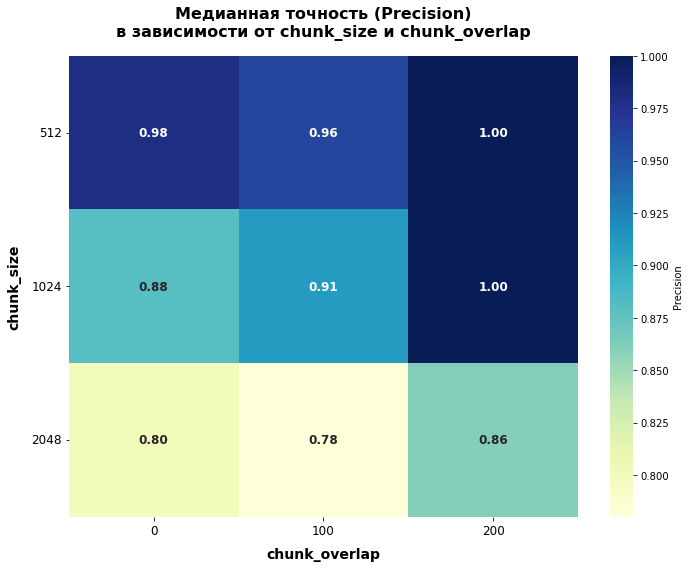

In [13]:
map_overlap_size = df.groupby(["chunk_size", "chunk_overlap"])["precision"].median().unstack()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    map_overlap_size,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    annot_kws={"size": 12, "weight": "bold"},
    cbar_kws={"label": "Precision"}
)

plt.title("Медианная точность (Precision)\nв зависимости от chunk_size и chunk_overlap",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("chunk_overlap", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("chunk_size", fontsize=14, fontweight="bold", labelpad=10)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=0)

plt.tight_layout()
plt.savefig("fig1.png")
plt.show()


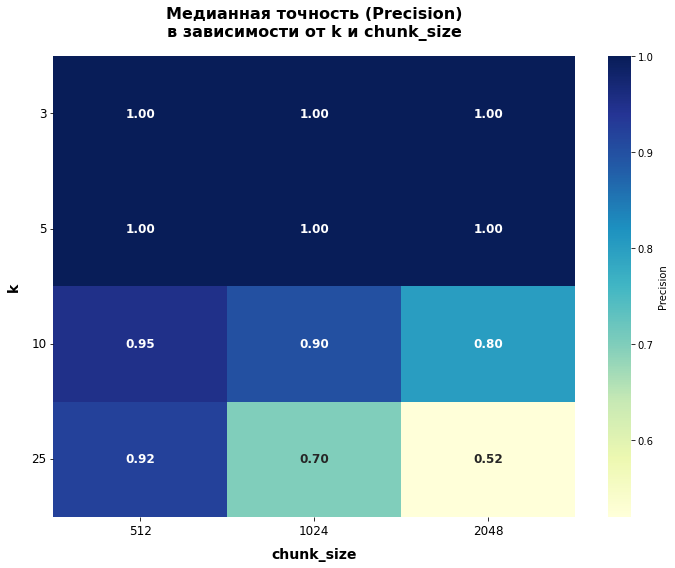

In [14]:
map_size_k = df.groupby(["k", "chunk_size"])["precision"].median().unstack()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    map_size_k, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu",
    annot_kws={"size": 12, "weight": "bold"},
    cbar_kws={"label": "Precision"}
)

plt.title("Медианная точность (Precision)\nв зависимости от k и chunk_size",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("chunk_size", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("k", fontsize=14, fontweight="bold", labelpad=10)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=0)

plt.tight_layout()

plt.savefig('fig2.png')
plt.show()

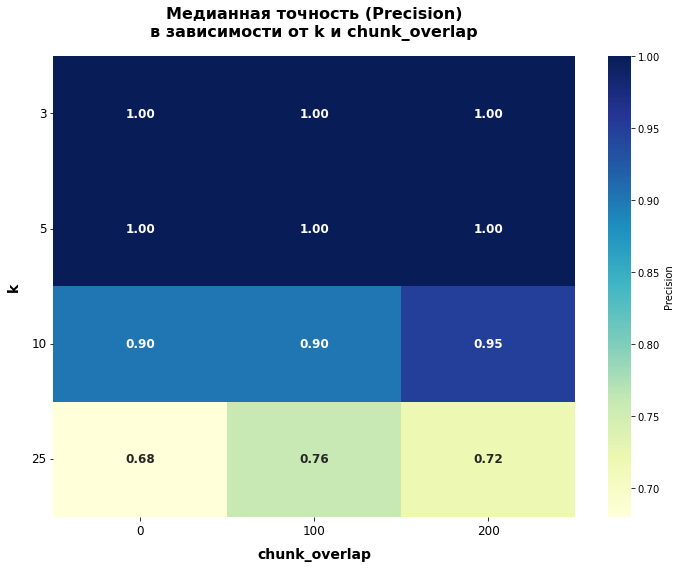

In [15]:
map_overlap_k = df.groupby(["k", "chunk_overlap"])["precision"].median().unstack()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    map_overlap_k,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    annot_kws={"size": 12, "weight": "bold"},
    cbar_kws={"label": "Precision"}
)

plt.title("Медианная точность (Precision)\nв зависимости от k и chunk_overlap",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("chunk_overlap", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("k", fontsize=14, fontweight="bold", labelpad=10)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=0)

plt.tight_layout()

plt.savefig('fig3.png')
plt.show()

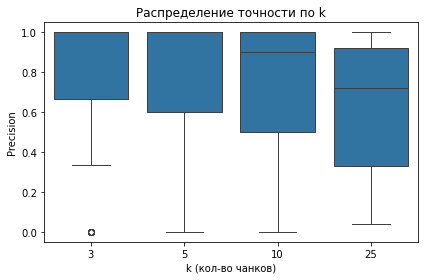

In [16]:
sns.boxplot(data=df, x="k", y="precision")
plt.title("Распределение точности по k")
plt.xlabel("k (кол-во чанков)")
plt.ylabel("Precision")
plt.tight_layout()
plt.show()

In [ ]:
for query in df["query"].unique():
    subset = df[df["query"] == query]
    plt.figure(figsize=(10, 5))

    for k in sorted(df["k"].unique()):
        k_data = subset[subset["k"] == k]
        if k_data.empty:
            continue

        labels = [f"{cs}_{co}" for cs, co in zip(k_data["chunk_size"], k_data["chunk_overlap"])]
        precisions = k_data["precision"].values 

        plt.plot(labels, precisions, marker='o', label=f"k={k}")

    plt.title(f"Precision по параметрам для запроса:\n{query}")
    plt.xlabel("chunk_size + overlap")
    plt.ylabel("Precision")
    plt.xticks(rotation=45)
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()